<h1 align='center'>Capstone 1 - Data Storytelling</h1>

<h3>
Kenneth Liao
<br>4/3/2019
</h3>

---

# Background

The goal of this project is to build a recommendation engine to recommend practice problems to students. The first part is to predict the number of attempts a student will require to solve a given problem. The idea is that if we can accurately predict the number of attempts a student will require to solve a problem, we can recommend a problem that is not too easy and not too hard (takes too many attempts). The data provided by Analytics Vidhya comes in three separate tables. The details of each dataset is described below.

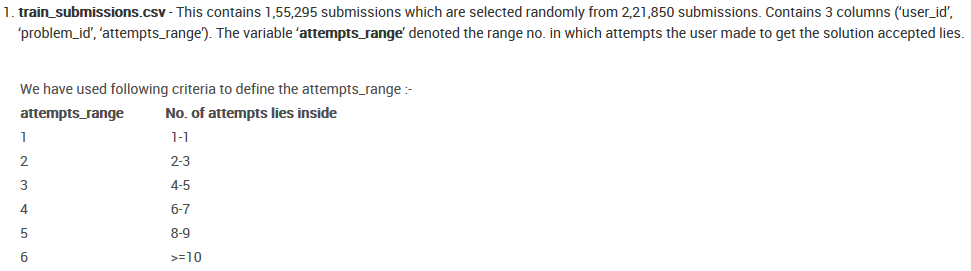
<br>

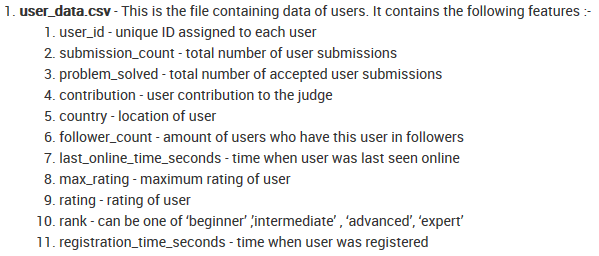
<br>

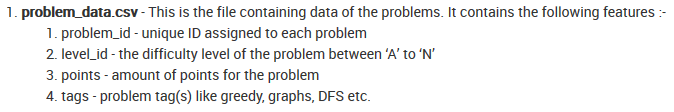
<br>

---

# Data Storytelling

In [1]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from tools import *
# config file contains API keys for using plotly
from config import credentials

# enable offline plotting in plotly
init_notebook_mode(connected=True)

In [2]:
# Load the submission, user, and problem datasets
submissions = pd.read_csv('data/train_submissions.csv')
problems = pd.read_csv('data/problem_features.csv')
users = pd.read_csv('data/user_features.csv')

## Submissions Dataset

I'll start by exploring the train_submission dataset. A sample of this dataset is shown in the table below. This is also the form of the data that will be submitted for benchmarking. There are only 3 columns: user_id, problem_id, and attempts_range; see above for how the number of attempts have been binned into the attempts_range variable.

In [3]:
submissions.head(10)

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1
5,user_1569,prob_6064,1
6,user_3293,prob_1237,1
7,user_915,prob_4125,2
8,user_2032,prob_1943,1
9,user_1410,prob_3935,1


### What attempts_range is the most common?

In [4]:
submissions_counts = submissions.groupby('attempts_range').count()
submissions_counts

,user_id,problem_id
attempts_range,,
1,82804,82804
2,47320,47320
3,14143,14143
4,5499,5499
5,2496,2496
6,3033,3033


In [5]:
bar = go.Bar(
    name = 'Number of problems solved',
    x=submissions_counts.index,
    y=submissions_counts['problem_id'],
    text=list(submissions_counts['problem_id']),
    textposition='auto'
    )

line = go.Scatter(
    name='Proportion',
    x=[1,2,3,4,5,6],
    y=[.533, .305, .091, .035, .016, .020],
    yaxis='y2'
)

layout = go.Layout(
    title='attempts_range Histogram',
    titlefont = dict(size=20),
    xaxis=dict(
        title='attempts_range',
        titlefont=dict(
            size=18
        )
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=18
        )
    ),
    yaxis2=dict(
        title='Proportion',
        titlefont=dict(
            size=18
        ),
        overlaying='y',
        side='right',
        tickformat= ',.1%',
        range= [0,1],
        showgrid=False
    ),
    legend=dict(
        orientation='h',
        y=1.1)
)

fig = go.Figure(data=[bar, line], layout=layout)

iplot(fig, filename='attempts_range_histogram')

The histogram above shows both the count and proportion of completed problems by attempts_range. 53% of problems are solved in a single attempt. 30.5% of problems are solved between 2 to 3 attempts and this drops quickly to 9.1% of problems being solved in 4 to 5 attempts. Because the provided data was already binned, there is no way for us to know what proportion of problems were solved for a specific number of attempts other than 1 attempt.

### How many unique users and problems are there?

In [6]:
trace1 = go.Bar(
    name = 'Unique Count in Train_Submission',
    x=['user_id', 'problem_id'],
    y=[submissions.user_id.nunique(), submissions.problem_id.nunique()],
    text=[submissions.user_id.nunique(), submissions.problem_id.nunique()],
    textposition='auto')

trace2 = go.Bar(
    name = 'Unique Count in Feature Data',
    x=['user_id', 'problem_id'],
    y=[users.user_id.nunique(), problems.problem_id.nunique()],
    text=[users.user_id.nunique(), problems.problem_id.nunique()],
    textposition='auto')

bar_layout = go.Layout(
    title='User and Problem Unique Counts',
    titlefont = dict(size=20),
    xaxis=dict(
        tickfont=dict(
            size=18
        ),
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=18
        )
    ),
    barmode='group',
    legend=dict(
        orientation='h',
        y=1.1)
)

fig = go.Figure(data=[trace1, trace2], layout=bar_layout)

iplot(fig, filename='attempts_range histogram')

The bar plot above shows the unique counts for user_id and problem_id both in the train_submission dataset (blue) and the feature data (orange). The feature data are just the other two tables, one for users and one for problems. We can see that the feature data has a higher unique count in both cases. This is what we would expect since the user and problem meta data should be collected for every user and problem. But not every user will necessarily have solved at least one problem and not ever problem will necessarily have been solved at least once, these would thus not be included in the train_submission data. 

In [7]:
set(submissions.user_id.unique()).difference(set(users.user_id.unique()))

set()

We can see from the set difference above that all user_ids in the submissions dataset are in fact present in the users dataset. We can check the same for the problems.

In [8]:
prob_differences = set(submissions.problem_id.unique()).difference(set(problems.problem_id.unique()))
prob_differences

set()

The same is true for the problem_ids

## Users Dataset

The table below show a sample of the users dataset. Let's compare the distributions of the submission_count and problem_solved features.

In [9]:
users.head(10)

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,user_attempts_median,user_attempts_min,user_attempts_max,user_attempts_count,user_attempts_iqr
0,user_1,84,73,10,Bangladesh,120,1505162220,502.007,499.713,advanced,1469108674,1.0,1.0,3.0,60.0,0.0
1,user_10,246,211,0,None,30,1505079658,326.548,313.360,intermediate,1472038187,1.0,1.0,3.0,51.0,0.0
2,user_100,642,574,27,Iran,106,1505073569,458.429,385.894,intermediate,1323974332,1.0,1.0,5.0,57.0,0.0
3,user_1000,259,235,0,India,41,1505579889,371.273,336.583,intermediate,1450375392,1.0,1.0,3.0,55.0,0.0
4,user_1001,554,492,-6,Moldova,55,1504521879,472.190,450.975,intermediate,1423399585,1.0,1.0,6.0,58.0,0.0
5,user_1002,127,108,0,Italy,7,1503094370,393.062,393.062,intermediate,1466579214,2.0,1.0,6.0,39.0,0.0
6,user_1003,14,14,0,None,0,1492588755,361.525,359.518,intermediate,1483011057,1.0,1.0,3.0,11.0,0.0
7,user_1004,310,287,1,None,14,1505136075,455.275,430.619,intermediate,1464745715,1.5,1.0,6.0,48.0,0.0
8,user_1005,332,301,3,India,27,1505583060,401.376,401.376,intermediate,1446652801,1.0,1.0,6.0,50.0,0.0
9,user_1006,5,3,0,None,1,1484905281,315.940,292.144,beginner,1473183931,1.0,1.0,1.0,2.0,0.0


In [10]:
create_hists(users, cols=['submission_count'])

In [11]:
create_hists(users, cols=['problem_solved'])

### What's the relationship between problems solved vs problems submitted?

The submission_count and problem_solved features appear to have very similar distributions. We can create a scatter plot of the problem_solved against submission_count to see how they're correlated.

In [22]:
trace = go.Scatter(
            x=users.submission_count,
            y=users.problem_solved,
            mode='markers')

layout = go.Layout(
            title='Problems solved vs submitted',
            titlefont = dict(size=20),
            xaxis=dict(
                title='submission_count',
                titlefont=dict(
                    size=18
                )
            ),
            yaxis=dict(
                title='problem_solved',
                titlefont=dict(
                    size=18
                )
            )
        )

fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='problem_solved vs submission_count')

The scatter plot above shows that there is a high correlation between problem_solved and submission_count. This is something we'll have to be aware of when building the regression model as colinearity in the features can cause repeatability issues in the model.

### What countries are users from?

In [13]:
country_counts = users[['user_id', 'country']].groupby('country').count().sort_values('user_id', ascending=False)

trace0 = go.Bar(
    name = 'Country Histogram',
    x=country_counts.head(20).index,
    y=country_counts.head(20).user_id,
    text=list(country_counts.head(20).user_id),
    textposition='auto')

bar_layout = go.Layout(
    title='Country Histogram',
    titlefont = dict(size=20),
    xaxis=dict(
        tickfont=dict(
            size=18
        ),
    ),
    yaxis=dict(
        title='Unique User Count',
        titlefont=dict(
            size=18
        )
    ),
    barmode='group',
    margin=go.layout.Margin(b=150)
)

fig = go.Figure(data=[trace0], layout=bar_layout)

iplot(fig, filename='country_histogram')

The sorted bar chart above shows the top 20 countries users are from. The majority of users do not actually have a recorded country of residence. We can see that most users come from India, Bangladesh, and Russia. To visualize all of the country data, we can use a chlorpleth map.

In [14]:
country_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

country_codes.COUNTRY = country_codes.COUNTRY.replace({'Korea, South': 'South Korea', 
                                                     'Korea, North': 'North Korea',
                                                    'Czech Republic': 'Czechia'})

country_mapping = {country_codes.loc[idx, 'COUNTRY']: country_codes.loc[idx, 'CODE'] for idx in country_codes.index}

users['country_code'] = users.country.map(country_mapping)

country_map = country_counts.copy()
country_map['country_code'] = country_counts.index.map(country_mapping)
country_map = country_map[country_map.index != 'None']

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [go.Choropleth(
    locations = country_map.country_code,
    z = country_map.user_id,
    text = country_map.index,
    colorscale = 'Reds',
    autocolorscale = False,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        title = 'User Counts')
)]

layout = go.Layout(
    title = 'User Counts by Country',
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename = 'user_county_by_country')

The map above displays the unique user counts by country on a world map. We see from the map that the majority of users are in Asia.

### Is there a high correlation between rating and max_rating?

In [15]:
create_hists(users, cols=['max_rating'])

In [16]:
create_hists(users, cols=['rating'])

In [17]:
trace = go.Scatter(
            name = 'Rating vs Max Rating',
            x=users.max_rating,
            y=users.rating,
            mode='markers')

layout = go.Layout(
            title='Rating vs Max Rating',
            titlefont = dict(size=20),
            xaxis=dict(
                title='Max Rating',
                titlefont=dict(
                    size=18
                )
            ),
            yaxis=dict(
                title='Rating',
                titlefont=dict(
                    size=18
                )
            )
        )

fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='Rating vs Max Rating')

There is a natural upper bound where for each user, the rating cannot be higher than the maximum rating they had. The upper bound corresponds to users with a rating equal to their current maximum rating. It's not clear what the rating number actually is from the description provided by Analytics Vidhya, but again we'll have to keep in mind this correlation between rating and max rating

## Problems Dataset

### What does the distribution of level_type look like?

In [18]:
problem_levels = problems[['level_type', 'problem_id']].groupby('level_type').count()

trace0 = go.Bar(
    name = 'Level_type Histogram',
    x=problem_levels.index,
    y=problem_levels.problem_id,
    text=list(problem_levels.problem_id),
    textposition='auto')

bar_layout = go.Layout(
    title='Level_type Histogram',
    titlefont = dict(size=20),
    xaxis=dict(
        tickfont=dict(
            size=18
        ),
    ),
    yaxis=dict(
        title='Unique Problem Count',
        titlefont=dict(
            size=18
        )
    )
)

fig = go.Figure(data=[trace0], layout=bar_layout)

iplot(fig, filename='level_type_histogram')

The sorted bar chart above shows the unique number of problems per level_type. We can see there is a monotonic decrease in unique problems as the level_type increases. There appears to be an abrupt drop between E and F level_types and then again a monotonic decrease

### What does the distribution of points look like?

In [19]:
problem_points = problems[['points', 'problem_id']].groupby('points').count()

trace = go.Histogram(
    name = 'Points Histogram',
    x=problems.points
)

layout = go.Layout(
            title='Points Histogram',
            titlefont = dict(size=20),
            xaxis=dict(
                autorange=True,
                title='Points',
                titlefont=dict(
                    size=18
                )
            ),
            yaxis=dict(
                autorange=True,
                title='Unique Problem Count',
                titlefont=dict(
                    size=18
                )
            )
        )

fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='points_histogram')

Besides the smaller bars, the distribution looks very similar to the level_type distribution above!

### What is the correlation between points and level_type?

Recall that we inferred from the data that the point value associated with each level_type increased by 500 point increments with increasing level_type. We then used this assumption to fill in missing point or level_type values. We can visualize this relationship below.

In [20]:
level_vs_points = problems[['level_type', 'points']].groupby('level_type').mean()

trace = go.Scatter(
            x=level_vs_points.index,
            y=level_vs_points.points,
            mode='markers')

layout = go.Layout(
            title='Mean point value vs level_type',
            titlefont = dict(size=20),
            xaxis=dict(
                title='level_type',
                titlefont=dict(
                    size=18
                )
            ),
            yaxis=dict(
                title='Mean(points)',
                titlefont=dict(
                    size=18
                )
            )
        )

fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='mean_points_vs_level_type')